In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
probs = [
    [0.1, 0.02],
    [0.02, 0.1],
]
n1 = 50
n2 = 50
n = n1 + n2
G = nx.stochastic_block_model([n1, n2], probs, seed=0) # グラフの生成

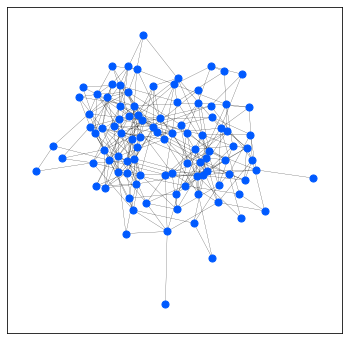

In [3]:
# グラフの描画
pos = nx.layout.spring_layout(G, seed=3)
fig, ax = plt.subplots(figsize=(6, 6))
nx.draw_networkx(G, pos, ax=ax, with_labels=False, width=0.2, node_size=50, node_color='#005aff')

In [4]:
# 訓練とテストの分割
nL = 20 # 訓練データ数
L = np.random.choice(n, size=nL, replace=False)
U = np.array(list(set(range(n)) - set(L.tolist())))

In [5]:
fV = np.zeros(nL, int)
for i, v in enumerate(L):
    if v < n1:
        p = 0.8
    else:
        p = 0.2
    if np.random.rand() < p:
        fV[i] = 1 # 正例

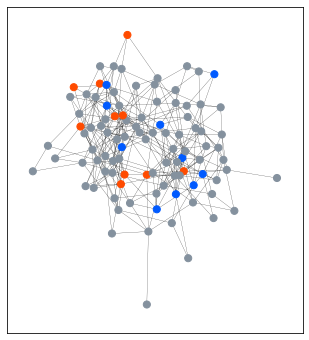

In [6]:
# 訓練ラベルの図示
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(1, 3, 1)
c = [0 for i in range(n)]
for i in range(n):
    if i in L and fV[L.tolist().index(i)] == 1:
        c[i] = '#ff4b00'
    elif i in L and fV[L.tolist().index(i)] == 0:
        c[i] = '#005aff'
    else:
        c[i] = '#84919e'
nx.draw_networkx(G, pos, ax=ax, with_labels=False, width=0.2, node_size=50, node_color=c)

In [7]:
W = nx.adjacency_matrix(G).todense() # 隣接行列
D = np.diag(W.sum(1)) # 次数行列

In [8]:
yhat = np.linalg.inv(D[U][:, U] - W[U][:, U]) @ W[U][:, L] @ fV # 式 (2.28) による予測
yhat

array([0.72766725, 0.68162167, 0.4708236 , 0.70328398, 0.57353061,
       0.69129816, 0.60261761, 0.69664939, 0.78454139, 0.70704977,
       0.72507996, 0.75593105, 0.45309598, 0.57005025, 0.65699008,
       0.70621932, 0.4525477 , 0.79917249, 0.63263428, 0.72776631,
       0.77934638, 0.66911459, 0.70964518, 0.67194518, 0.7208995 ,
       0.60913392, 0.66721608, 0.56876576, 0.70667039, 0.54818277,
       0.68563516, 0.60664079, 0.60974312, 0.54370971, 0.73803555,
       0.36947541, 0.68917837, 0.65428881, 0.5010713 , 0.54414932,
       0.49116093, 0.21772696, 0.36880204, 0.58366143, 0.22687971,
       0.63929205, 0.46727883, 0.42602666, 0.69888899, 0.2223148 ,
       0.36983655, 0.32648008, 0.59107311, 0.15493127, 0.41540432,
       0.49472954, 0.54414932, 0.30986255, 0.61825564, 0.41858856,
       0.41205337, 0.63929205, 0.31441909, 0.36851209, 0.46912649,
       0.60839172, 0.44462959, 0.48856528, 0.48611844, 0.40768507,
       0.338792  , 0.48105379, 0.50901097, 0.41997477, 0.39585

In [9]:
# スコアの図示
ax = fig.add_subplot(1, 3, 2)
c = [None for i in range(n)]
for i in range(n):
    if i in L and fV[L.tolist().index(i)] == 1:
        c[i] = '#ff4b00'
    elif i in L and fV[L.tolist().index(i)] == 0:
        c[i] = '#005aff'
    else:
        p = yhat[U.tolist().index(i)]
        c[i] = (p, 0.294 * p + 0.353 * (1 - p), 1 - p)
c = np.array(c, dtype=object)
nx.draw_networkx(G, pos, ax=ax, with_labels=False, width=0.2, node_size=50, node_color=c)

In [10]:
# 予測ラベルの図示
ax = fig.add_subplot(1, 3, 3)
c = [0 for i in range(n)]
for i in range(n):
    if i in L and fV[L.tolist().index(i)] == 1:
        c[i] = '#ff4b00'
    elif i in L and fV[L.tolist().index(i)] == 0:
        c[i] = '#005aff'
    else:
        p = yhat[U.tolist().index(i)]
        if p > 0.5:
            c[i] = '#ff4b00'
        else:
            c[i] = '#005aff'
nx.draw_networkx(G, pos, ax=ax, with_labels=False, width=0.2, node_size=50, node_color=c)

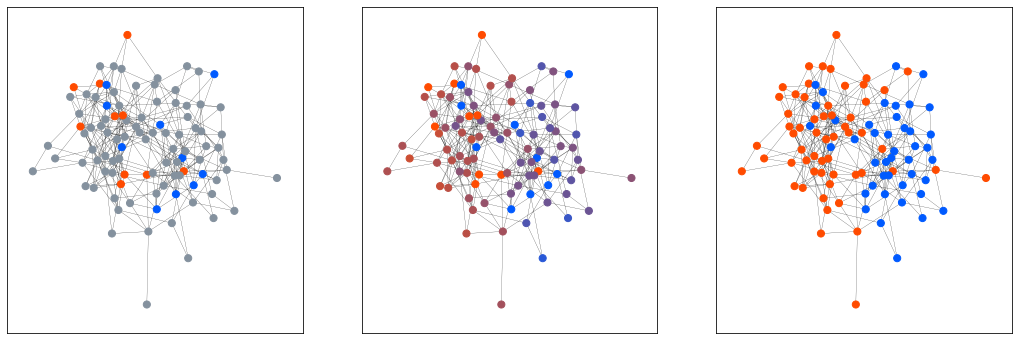

In [11]:
fig